# **1. 손 글씨 데이터 셋**

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
data = digits['data']

data.shape

(1797, 64)

In [7]:
target = digits['target']

target.shape

(1797,)

In [8]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
import matplotlib.pyplot as plt

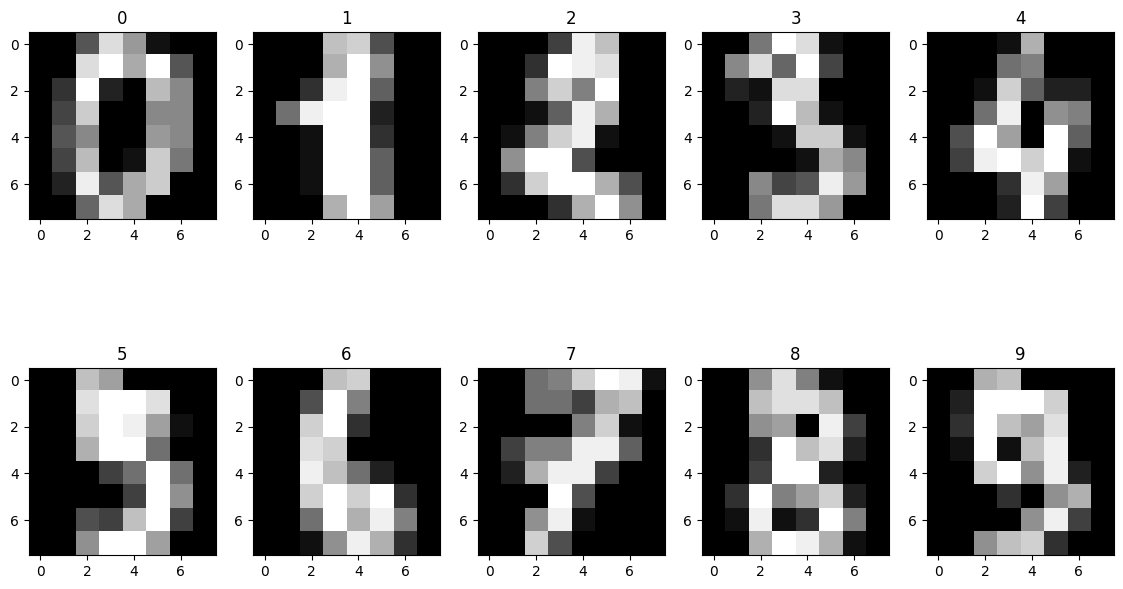

In [10]:
_, axes = plt.subplots(2, 5, figsize=(14, 8))

for i , ax in enumerate(axes.flatten()):
    ax.imshow(data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(target[i])

# **2. 스케일링(Scaling)**

* 데이터를 특정한 스케일로 통일 하는 것
* 다차원의 값들을 비교 분석 하기 쉽게 만들어주며 자료의 오버플로우나 언더플로우를 방지하여 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 데이터를 모델링하기 전에 거치는 것이 좋음

### 2-1. 스케일링의 종류

* StandardScaler : 평균과 표준 편차를 사용
* MinMaxscaler : 최소, 최대값이 각각 0과 1이 되도록 스케일링
* RobustScaler : 중앙값과 IQR사용(아웃라이어의 영향을 최소화)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
movie = {'naver' : [2, 4, 10, 8, 6],
         'netflix' : [1, 5, 3, 2, 5]}

In [14]:
movie = pd.DataFrame(movie)

movie

,naver,netflix
0,2,1
1,4,5
2,10,3
3,8,2
4,6,5


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [46]:
min_max_scaler = MinMaxScaler()

In [47]:
min_max_scaler0 = min_max_scaler.fit_transform(movie)

min_max_scaler0

array([[0.  , 0.  ],
       [0.25, 1.  ],
       [1.  , 0.5 ],
       [0.75, 0.25],
       [0.5 , 1.  ]])

In [50]:
pd.DataFrame(min_max_scaler0, columns = ['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,1.00
2,1.00,0.50
3,0.75,0.25
4,0.50,1.00


### 2-2. 정규화(Normalization)

* 값의 범위 (scale)을 0 ~ 1 사이의 값으로 바꿔주는 것
* 학습 전에 scaling을 하는 것
* 머신러닝 딥러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
* sckitlearn에서 MinMaxscaler 사용

In [51]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [52]:
scaled_data = min_max_scaler.fit_transform(data)

scaled_data[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

### 2-3. 표준화(Standardization)

* 값의 범위를 평균 분산 1이 되도록 바꿔주는 것
* 학습전에 scaling 하는 것
* 머신러닝 딥러닝에서 scale이 큰 feature의 영향이 비대해지는 것을 방지
* sckitlearn에서 StandardScaler 사용

In [29]:
sample = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

standardscaler = StandardScaler()
scaled_sample = standardscaler.fit_transform(sample)

print('원본데이터 : ', sample)
print('스케일링 데이터 : ', scaled_sample)

원본데이터 :  [[1 2]
 [3 4]
 [5 6]
 [7 8]]
스케일링 데이터 :  [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


In [30]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 2024)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# **3. Support Vector Machine(SVM)**

<center><img src="https://i.imgur.com/l1NQNvD.png" width="700px"></center>

* 두 클래스로 부터 최대한 멀리 떨어져 있는 결정 경계를 찾는 분류기
* 특정 조건을 만족하는 동시에 클래스를 분류하는 것을 목표로 함

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [57]:
model = SVC()

In [58]:
model.fit(X_train, y_train)

SVC()

In [59]:
y_pred = model.predict(X_test)

In [60]:
accuracy_score(y_test, y_pred)

0.9888888888888889

In [61]:
print(y_test[10], y_pred[10])

7 7


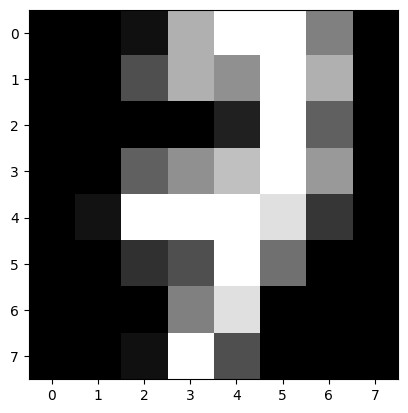

In [64]:
plt.imshow(X_test[10].reshape(8, 8), cmap ='gray')

plt.show()

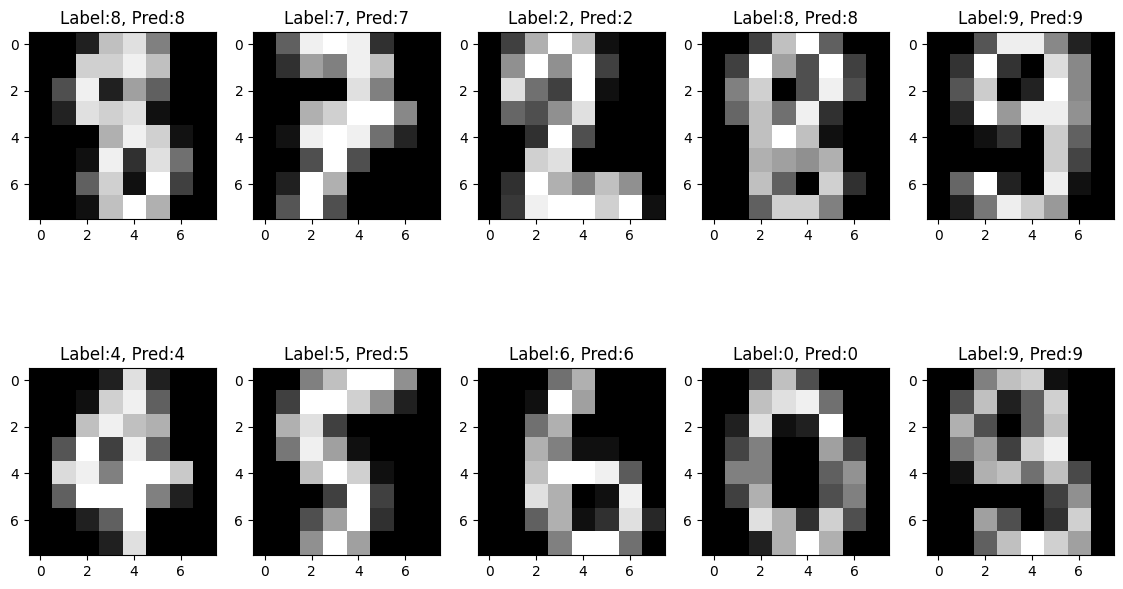

In [65]:
_, axes = plt.subplots(2, 5, figsize=(14, 8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape((8, 8)), cmap='gray')
    ax.set_title(f'Label:{y_test[i]}, Pred:{y_pred[i]}')